In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import matplotlib.image as mpimg
from shapely.geometry import Point, LineString

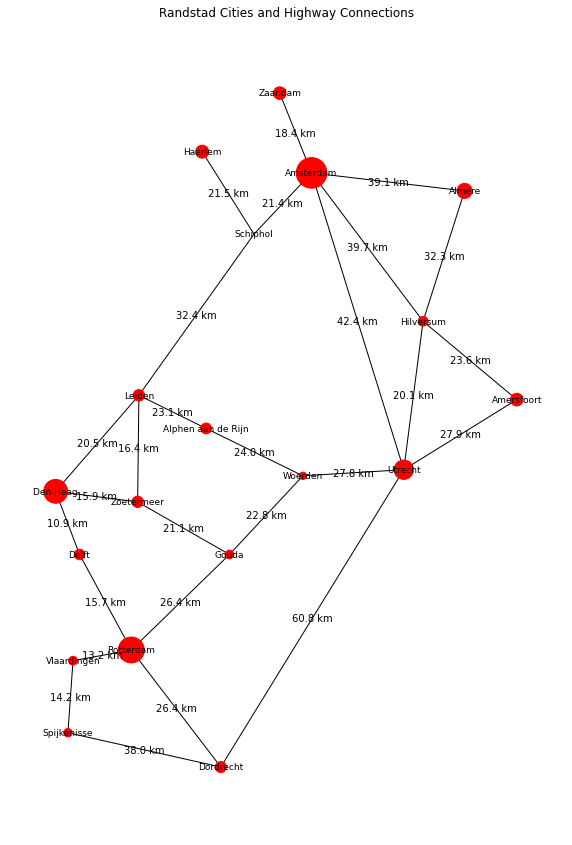

                   City  €/m2 per jaar
0               Zaandam            230
1             Amsterdam            500
2               Haarlem            300
3              Schiphol            250
4                Leiden            185
5              Den Haag            230
6            Zoetermeer            150
7                 Delft            190
8             Rotterdam            280
9           Spijkenisse            130
10            Dordrecht            150
11          Vlaardingen            110
12  Alphen aan den Rijn            140
13                Gouda            140
14              Woerden            175
15              Utrecht            300
16            Hilversum            150
17               Almere            140
18           Amersfoort            150


In [14]:
# Your cities and their geographical coordinates
cities_coords = {
    "Zaandam": (52.442, 4.829),
    "Amsterdam": (52.3676, 4.9041),
    "Haarlem": (52.3874, 4.6462),
    "Schiphol": (52.3105, 4.7683),
    "Leiden": (52.1601, 4.4970),
    "Den Haag": (52.0705, 4.3007),
    "Zoetermeer": (52.0607, 4.4940),
    "Delft": (52.0116, 4.3571),
    "Rotterdam": (51.9225, 4.4792),
    "Spijkenisse": (51.8453, 4.3297),
    "Dordrecht": (51.8133, 4.6901),
    "Vlaardingen": (51.9125, 4.3417),
    "Alphen aan de Rijn": (52.1292, 4.6555),
    "Gouda": (52.0116, 4.7105),
    "Woerden": (52.0850, 4.8836),
    "Utrecht": (52.0907, 5.1214),
    "Hilversum": (52.2292, 5.1669),
    "Almere": (52.3508, 5.2647),
    "Amersfoort": (52.1561, 5.3878),
}
connections = [
    (42.4, "Amsterdam", "Utrecht"),
    (32.4, "Leiden", "Schiphol"),
    (20.5, "Den Haag", "Leiden"),
    (21.1, "Gouda", "Zoetermeer"),
    (22.8, "Woerden", "Gouda"),
    (27.8, "Utrecht", "Woerden"),
    (10.9, "Den Haag", "Delft"),
    (18.4, "Amsterdam", "Zaandam"),
    (39.1, "Amsterdam", "Almere"),
    (39.7, "Amsterdam", "Hilversum"),
    (21.4, "Amsterdam", "Schiphol"),
    (32.3, "Almere", "Hilversum"),
    (23.6, "Amersfoort", "Hilversum"),
    (20.1, "Hilversum", "Utrecht"),
    (27.9, "Amersfoort", "Utrecht"),
    (21.5, "Haarlem", "Schiphol"),
    (23.1, "Leiden", "Alphen aan de Rijn"),
    (16.4, "Leiden", "Zoetermeer"),
    (24.0, "Woerden", "Alphen aan de Rijn"),
    (15.9, "Zoetermeer", "Den Haag"),
    (15.7, "Delft", "Rotterdam"),
    (26.4, "Rotterdam", "Gouda"),
    (13.2, "Rotterdam", "Vlaardingen"),
    (26.4, "Rotterdam", "Dordrecht"),
    (14.2, "Vlaardingen", "Spijkenisse"),
    (38.0, "Spijkenisse", "Dordrecht"),
    (60.8, "Dordrecht", "Utrecht"),
]
cities_population = {
    "Zaandam": 161429,
    "Amsterdam": 934927,
    "Haarlem": 167763,
    "Schiphol": 1,
    "Leiden": 130181,
    "Den Haag": 565701,
    "Zoetermeer": 128424,
    "Delft": 109573,
    "Rotterdam": 671125,
    "Spijkenisse": 71390,
    "Dordrecht": 122089,
    "Vlaardingen": 76472,
    "Alphen aan de Rijn": 114968,
    "Gouda": 75763,
    "Woerden": 53237,
    "Utrecht": 374411,
    "Hilversum": 94426,
    "Almere": 226630,
    "Amersfoort": 160747
}
# Create a networkx graph
G = nx.Graph()

# Add nodes to the graph
for city, (lat, lon) in cities_coords.items():
    population = cities_population.get(city, 0)  # Default to 0 if not found
    G.add_node(city, pos=(lon, lat), population=population, weight=population)
# Add edges to the graph
for distance, city1, city2 in connections:
    G.add_edge(city1, city2, weight=distance)

# Load the PNG image
#img = mpimg.imread('/path/to/your/SnelwegenNederland_2008.png')  # Update the path to the image

# Get positions for cities to use for layout
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
fig, ax = plt.subplots(figsize=(10, 15))
#ax.imshow(img, extent=[3.2, 7.4, 50.7, 53.7])  # You might need to adjust the extent to fit your image
node_sizes = [G.nodes[city]['population'] / 1000 for city in G.nodes]
# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='red', ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)

# Annotate the edges with distances
for (city1, city2, data) in G.edges(data=True):
    edge_midpoint = [(pos[city1][0] + pos[city2][0]) / 2, (pos[city1][1] + pos[city2][1]) / 2]
    ax.text(edge_midpoint[0], edge_midpoint[1], f"{data['weight']} km", size=10, ha='center', va='center')

# Set the title and remove the axis
ax.set_title('Randstad Cities and Highway Connections')
plt.axis('off')  # Turn off the axis
plt.show()

In [3]:
# Code for part 3:
# Calculate eigenvector centrality
centrality = nx.eigenvector_centrality(G)
# Sort the nodes by eigenvector centrality values in descending order
sorted_centrality = sorted(centrality.items(), key=lambda item: item[1], reverse=True)

# Print the sorted centrality values
print("Eigenvector Centrality (sorted):")
for node, cent_value in sorted_centrality:
    print(f"Node {node}: {cent_value}")

Eigenvector Centrality (sorted):
Node Utrecht: 0.4630239130443246
Node Amsterdam: 0.43988693349842145
Node Hilversum: 0.42540892878717296
Node Amersfoort: 0.2650281273551886
Node Almere: 0.2581259975265145
Node Woerden: 0.2149145866023495
Node Dordrecht: 0.20691792078876856
Node Schiphol: 0.19681623270640866
Node Leiden: 0.16116868156368458
Node Rotterdam: 0.14835918906715603
Node Gouda: 0.14522217077253732
Node Zaandam: 0.13122250937025476
Node Zoetermeer: 0.12353618430608682
Node Alphen aan de Rijn: 0.11219064982972979
Node Den Haag: 0.10772133212317621
Node Spijkenisse: 0.08224799378148019
Node Delft: 0.0763928546788032
Node Vlaardingen: 0.06879328158983965
Node Haarlem: 0.058712519695516996


In [4]:
import pandas as pd

# Load the Excel file
file_path = 'rental price office per m2.xlsx'
df = pd.read_excel(file_path, usecols="B:C")
# Convert the centrality to a DataFrame for easier manipulation
centrality_df = pd.DataFrame(list(centrality.items()), columns=['City', 'Centrality'])

# Merge the Excel data with the centrality values based on city names
merged_df = pd.merge(df, centrality_df, on='City')

# Calculate the multiplied values
merged_df['Multiplied Value'] = merged_df['€/m2 per jaar'] * merged_df['Centrality']

# Sort the dataframe by 'Multiplied Value' in descending order
sorted_merged_df = merged_df.sort_values(by='Multiplied Value', ascending=False)

# Print the resulting DataFrame sorted by 'Multiplied Value'
print(sorted_merged_df)


           City  €/m2 per jaar  Centrality  Multiplied Value
1     Amsterdam            500    0.439887        219.943467
14      Utrecht            300    0.463024        138.907174
15    Hilversum            150    0.425409         63.811339
3      Schiphol            250    0.196816         49.204058
8     Rotterdam            280    0.148359         41.540573
17   Amersfoort            150    0.265028         39.754219
13      Woerden            175    0.214915         37.610053
16       Almere            140    0.258126         36.137640
10    Dordrecht            150    0.206918         31.037688
0       Zaandam            230    0.131223         30.181177
4        Leiden            185    0.161169         29.816206
5      Den Haag            230    0.107721         24.775906
12        Gouda            140    0.145222         20.331104
6    Zoetermeer            150    0.123536         18.530428
2       Haarlem            300    0.058713         17.613756
7         Delft         

In [5]:
import matplotlib.patches as mpatches

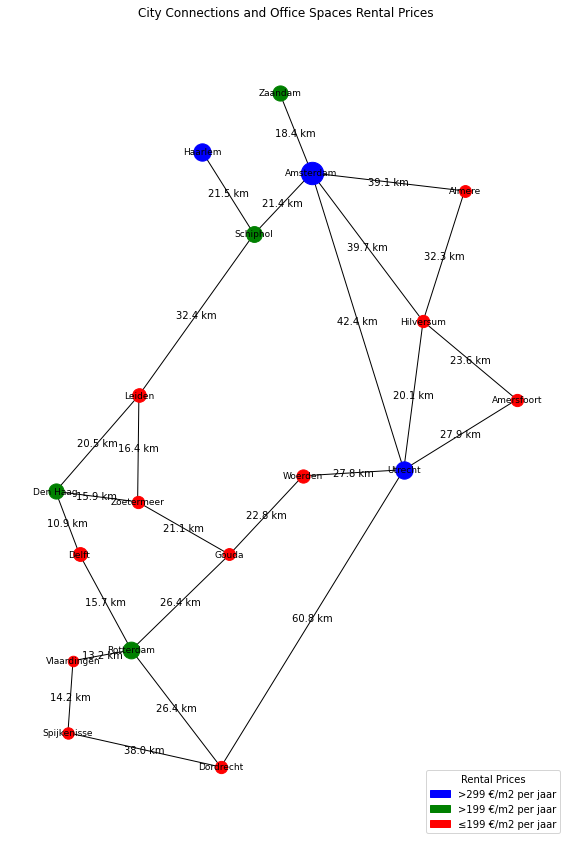

,City,€/m2 per jaar
0,Zaandam,230
1,Amsterdam,500
2,Haarlem,300
3,Schiphol,250
4,Leiden,185
5,Den Haag,230
6,Zoetermeer,150
7,Delft,190
8,Rotterdam,280
9,Spijkenisse,130


In [17]:
# Load rental price data
excel_path = 'rental price office per m2.xlsx'
df = pd.read_excel(excel_path)

# Create a networkx graph
G = nx.Graph()

# Add nodes to the graph with sizes based on the €/m2 per jaar
for index, row in df.iterrows():
    city = row['City']
    price_per_m2 = row['€/m2 per jaar']
    # Here you might need to adjust how you access the coordinates
    if city in cities_coords:
        lat, lon = cities_coords[city]
        G.add_node(city, pos=(lon, lat), price_per_m2=price_per_m2)

# Add edges to the graph
for distance, city1, city2 in connections:
    if city1 in G.nodes and city2 in G.nodes:  # Check if both cities are in the graph
        G.add_edge(city1, city2, weight=distance)

# Get positions for cities to use for layout
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph with white background
fig, ax = plt.subplots(figsize=(10, 15))

# Node size and color based on €/m2 per jaar
for city in G.nodes:
    price_per_m2 = G.nodes[city]['price_per_m2']
    node_color = 'red'  # default color
    if price_per_m2 > 299:
        node_color = 'blue'
    elif price_per_m2 > 199:
        node_color = 'green'
    
    # Adjust the node size based on the price per m2 (with a scaling factor for visualization)
    node_size = price_per_m2  # Example scaling, adjust as needed
    nx.draw_networkx_nodes(G, pos, nodelist=[city], node_size=node_size, node_color=node_color, ax=ax)

# Draw labels and edges as normal
nx.draw_networkx_labels(G, pos, font_size=9, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)

# Annotate edges with distances, if necessary
for (city1, city2, data) in G.edges(data=True):
    edge_midpoint = [(pos[city1][0] + pos[city2][0]) / 2, (pos[city1][1] + pos[city2][1]) / 2]
    ax.text(edge_midpoint[0], edge_midpoint[1], f"{data['weight']} km", size=10, ha='center', va='center')

legend_patches = [
    mpatches.Patch(color='blue', label='>299 €/m2 per jaar'),
    mpatches.Patch(color='green', label='>199 €/m2 per jaar'),
    mpatches.Patch(color='red', label='≤199 €/m2 per jaar')
]
# Set the title and remove the axis
ax.set_title('City Connections and Office Spaces Rental Prices')
plt.legend(handles=legend_patches, loc='lower right', title='Rental Prices')
plt.axis('off')
plt.show()

In [20]:
table_euro_per_m2 = df[['City', '€/m2 per jaar']].dropna()
# First, sort the table in descending order by '€/m2 per jaar'
sorted_table_euro_per_m2 = table_euro_per_m2.sort_values(by='€/m2 per jaar', ascending=False)

# Apply styling
styled_sorted_table_euro_per_m2 = sorted_table_euro_per_m2.style.set_properties(**{
    'background-color': 'white',  # Set background color
    'border-color': 'black',      # Set border color
    'color': 'black'           # Make text color darker
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', 'gray'), ('color', 'white')]  # Header styling
}]).set_caption("Cities and €/m2 per jaar")  # Adding a caption

# Display the styled and sorted table
styled_sorted_table_euro_per_m2

,City,€/m2 per jaar
1,Amsterdam,500
2,Haarlem,300
15,Utrecht,300
8,Rotterdam,280
3,Schiphol,250
0,Zaandam,230
5,Den Haag,230
7,Delft,190
4,Leiden,185
14,Woerden,175


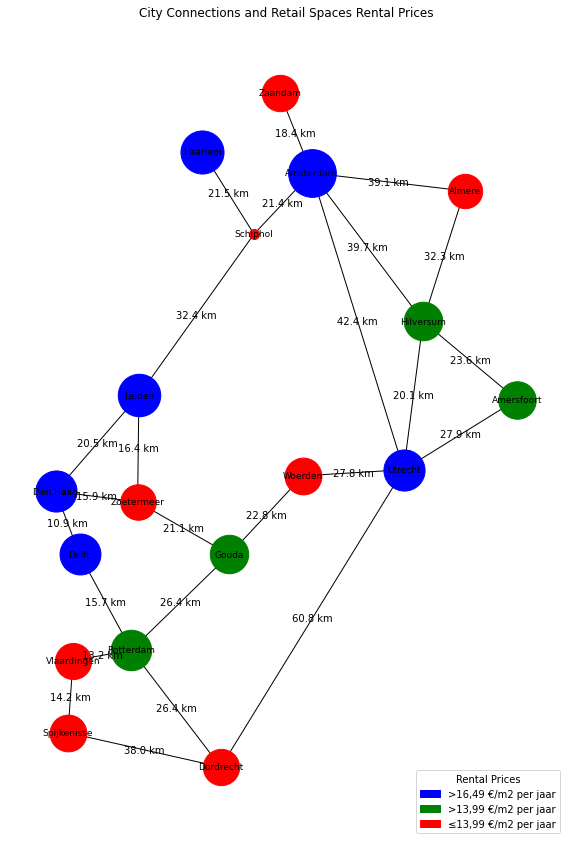

In [21]:
# Load rental price data
excel_path = 'rental price office per m2.xlsx'
df = pd.read_excel(excel_path)
df['huurprijs/m2'] = pd.to_numeric(df['huurprijs/m2'].str.replace(',', '.'), errors='coerce')
# Create a networkx graph
G = nx.Graph()

# Add nodes to the graph with sizes based on the €/m2 per jaar
for index, row in df.iterrows():
    city = row['City2']
    price_per_m2 = row['huurprijs/m2']
    # Here you might need to adjust how you access the coordinates
    if city in cities_coords:
        lat, lon = cities_coords[city]
        G.add_node(city, pos=(lon, lat), price_per_m2=price_per_m2)

# Add edges to the graph
for distance, city1, city2 in connections:
    if city1 in G.nodes and city2 in G.nodes:  # Check if both cities are in the graph
        G.add_edge(city1, city2, weight=distance)

# Get positions for cities to use for layout
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph with white background
fig, ax = plt.subplots(figsize=(10, 15))

# Node size and color based on €/m2 per jaar
for city in G.nodes:
    price_per_m2 = G.nodes[city]['price_per_m2']
    node_color = 'red'  # default color
    if price_per_m2 > 16.49:
        node_color = 'blue'
    elif price_per_m2 > 14:
        node_color = 'green'
    
    # Adjust the node size based on the price per m2 (with a scaling factor for visualization)
    node_size = price_per_m2 * 100 
    nx.draw_networkx_nodes(G, pos, nodelist=[city], node_size=node_size, node_color=node_color, ax=ax)

# Draw labels and edges as normal
nx.draw_networkx_labels(G, pos, font_size=9, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)

# Annotate edges with distances, if necessary
for (city1, city2, data) in G.edges(data=True):
    edge_midpoint = [(pos[city1][0] + pos[city2][0]) / 2, (pos[city1][1] + pos[city2][1]) / 2]
    ax.text(edge_midpoint[0], edge_midpoint[1], f"{data['weight']} km", size=10, ha='center', va='center')

legend_patches = [
    mpatches.Patch(color='blue', label='>16,49 €/m2 per maand'),
    mpatches.Patch(color='green', label='>13,99 €/m2 per maand'),
    mpatches.Patch(color='red', label='≤13,99 €/m2 per maand')
]
# Set the title and remove the axis
ax.set_title('City Connections and Retail Spaces Rental Prices')
plt.legend(handles=legend_patches, loc='lower right', title='Rental Prices')
plt.axis('off')
plt.show()

In [29]:
table_rent_per_m2 = df[['City2', 'huurprijs/m2']].dropna().rename(columns={"City2": "City"})
# First, sort the table in descending order by 'huurprijs/m2'
sorted_table_rent_per_m2 = table_rent_per_m2.sort_values(by='huurprijs/m2', ascending=False)

styled_sorted_table_rent_per_m2 = sorted_table_rent_per_m2.style.format({
    'huurprijs/m2': "{:.2f}"  # Format to two decimal places
}).set_properties(**{
    'background-color': 'white',
    'border-color': 'black',
    'color': 'black'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', 'gray'), ('color', 'white')]
}]).set_caption("Cities and huurprijs/m2")

# Display the styled and sorted table
styled_sorted_table_rent_per_m2

,City,huurprijs/m2
1,Amsterdam,22.78
2,Haarlem,18.54
4,Leiden,18.07
5,Den Haag,16.91
15,Utrecht,16.91
7,Delft,16.73
8,Rotterdam,16.37
12,Alphen aan den Rijn,15.85
16,Hilversum,14.88
13,Gouda,14.79
